In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
from src.eda.load_gold_data import load_gold_happiness_data
from src.eda.explore_gold_data import EDAExplorer

c:\Users\HP\OneDrive\Documents\Data Science\Data and Information Visualisation\Assignment 2 - LATEST\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
gold_df = load_gold_happiness_data()
display(gold_df.head())

,country_name,freedom_to_make_life_choices,generosity,healthy_life_expectancy,ladder_score,logged_gdp_per_capita,perceptions_of_corruption,regional_indicator,social_support,year,country,latitude,longitude
0,Afghanistan,0.718,0.168,50.80,3.724,7.370,0.882,South Asia,0.451,2008,AF,33.93911,67.709953
1,Afghanistan,0.679,0.190,51.20,4.402,7.540,0.850,South Asia,0.552,2009,AF,33.93911,67.709953
2,Afghanistan,0.600,0.121,51.60,4.758,7.647,0.707,South Asia,0.539,2010,AF,33.93911,67.709953
3,Afghanistan,0.496,0.162,51.92,3.832,7.620,0.731,South Asia,0.521,2011,AF,33.93911,67.709953
4,Afghanistan,0.531,0.236,52.24,3.783,7.705,0.776,South Asia,0.521,2012,AF,33.93911,67.709953


In [4]:
def inspect_df(df: pd.DataFrame = gold_df) -> None:
    
    display(df.info(memory_usage='deep'))
    
    for col in df.select_dtypes(include="object").columns:
        df[col] = df[col].astype("category")
    for col in df.select_dtypes(include="int64").columns:
        df[col] = df[col].astype("int32")
    for col in df.select_dtypes(include="float64").columns:
        df[col] = df[col].astype("float32")
    
    display(df.info(memory_usage='deep'))

    display(df.describe())

inspect_df()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2027 entries, 0 to 2026
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country_name                  2027 non-null   object 
 1   freedom_to_make_life_choices  2027 non-null   float64
 2   generosity                    2027 non-null   float64
 3   healthy_life_expectancy       2002 non-null   float64
 4   ladder_score                  2027 non-null   float64
 5   logged_gdp_per_capita         2027 non-null   float64
 6   perceptions_of_corruption     2001 non-null   float64
 7   regional_indicator            2027 non-null   object 
 8   social_support                2027 non-null   float64
 9   year                          2027 non-null   int64  
 10  country                       2020 non-null   object 
 11  latitude                      2027 non-null   float64
 12  longitude                     2027 non-null   float64
dtypes: 

None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2027 entries, 0 to 2026
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   country_name                  2027 non-null   category
 1   freedom_to_make_life_choices  2027 non-null   float32 
 2   generosity                    2027 non-null   float32 
 3   healthy_life_expectancy       2002 non-null   float32 
 4   ladder_score                  2027 non-null   float32 
 5   logged_gdp_per_capita         2027 non-null   float32 
 6   perceptions_of_corruption     2001 non-null   float32 
 7   regional_indicator            2027 non-null   category
 8   social_support                2027 non-null   float32 
 9   year                          2027 non-null   int32   
 10  country                       2020 non-null   category
 11  latitude                      2027 non-null   float32 
 12  longitude                     2027 non-null   fl

None

,freedom_to_make_life_choices,generosity,healthy_life_expectancy,ladder_score,logged_gdp_per_capita,perceptions_of_corruption,social_support,year,latitude,longitude
count,2027.000000,2027.000000,2002.000000,2027.000000,2027.000000,2001.000000,2027.000000,2027.000000,2027.000000,2027.000000
mean,0.748622,-0.002234,63.709759,5.490372,9.392256,0.740497,0.814963,2013.817958,23.149408,20.849066
std,0.139418,0.161650,7.350222,1.109630,1.139696,0.189123,0.116263,4.517369,24.887794,56.921196
min,0.258000,-0.335000,32.299999,2.375000,6.635000,0.035000,0.291000,2005.000000,-40.900558,-106.346771
25%,0.656000,-0.118000,59.259998,4.668000,8.484000,0.682000,0.751000,2010.000000,7.946527,-1.561593
50%,0.769000,-0.029000,65.400002,5.409000,9.487000,0.799000,0.837000,2014.000000,26.335100,21.824312
75%,0.861000,0.089000,68.830002,6.308000,10.371000,0.868000,0.907000,2018.000000,42.602634,47.481766
max,0.985000,0.698000,77.099998,8.019000,11.648000,0.983000,0.987000,2021.000000,64.963051,174.885971



First 5 rows

  country_name  freedom_to_make_life_choices  generosity  \
0  Afghanistan                         0.718       0.168   
1  Afghanistan                         0.679       0.190   
2  Afghanistan                         0.600       0.121   
3  Afghanistan                         0.496       0.162   
4  Afghanistan                         0.531       0.236   

   healthy_life_expectancy  ladder_score  logged_gdp_per_capita  \
0                50.799999         3.724                  7.370   
1                51.200001         4.402                  7.540   
2                51.599998         4.758                  7.647   
3                51.919998         3.832                  7.620   
4                52.240002         3.783                  7.705   

   perceptions_of_corruption regional_indicator  social_support  year country  \
0                      0.882         South Asia           0.451  2008      AF   
1                      0.850         South Asia           0

AttributeError: 'EDAExplorer' object has no attribute 'boxplots'

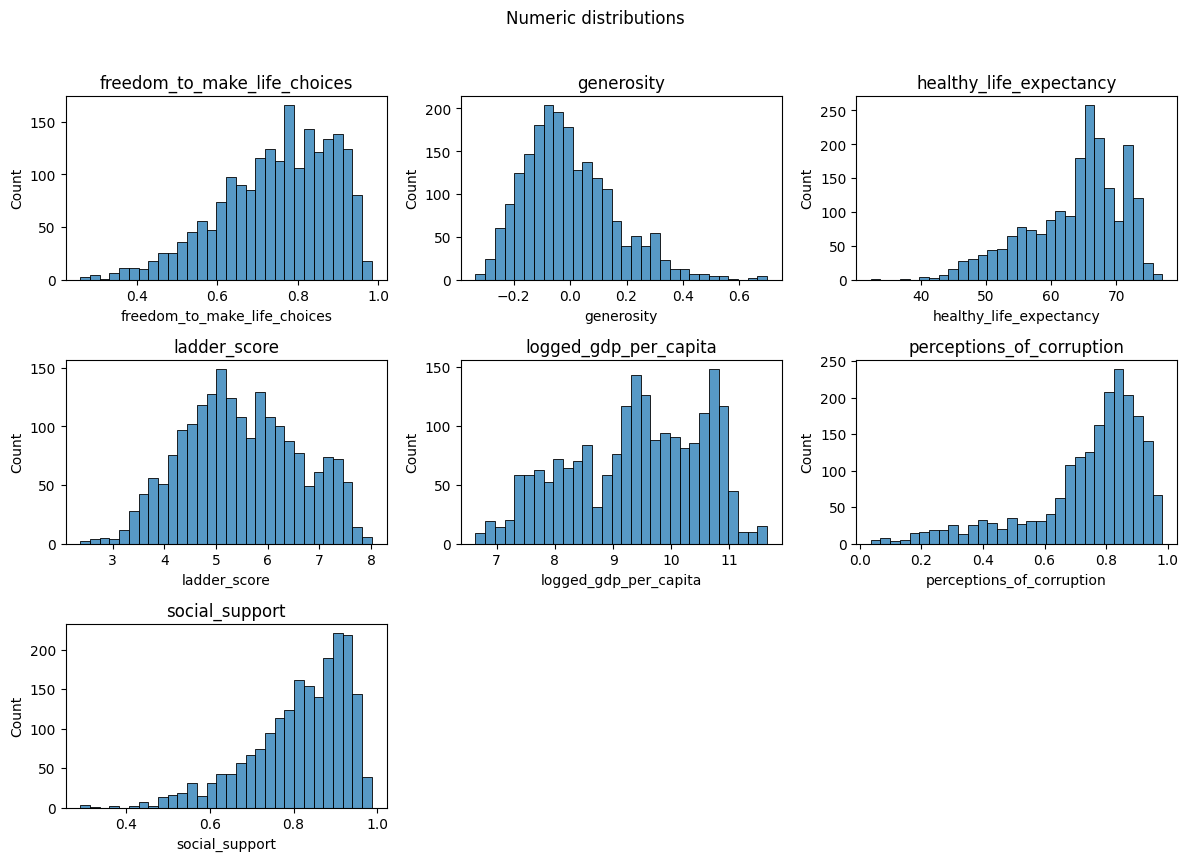

In [ ]:
exp = EDAExplorer(df = gold_df)
exp.preview()
exp.histograms(exclude=["year", "latitude", "longitude"])
exp.boxplots(exclude=["year", "latitude", "longitude"])